In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import frame
import LP
import MSE

Quantization step = 16
Number of frames to encode = 36
Original video = /tmp/original_
Codestream = /tmp/codestream_
Reconstructed video = /tmp/reconstructed_
Number of spatial resolution levels = 5
Frames per second = 30
Wavelet = bior3.5
DWT extension mode = periodization
OFCA extension mode = 0


In [2]:
x = frame.read(f"../sequences/stockholm_5_frames/{0:03d}").astype(np.int16)

frame.read(../sequences/stockholm_5_frames/000) (768, 1280, 3) uint8 1927590


In [3]:
x.dtype

dtype('int16')

In [4]:
L,H = LP.analyze_step(x)

In [5]:
L.shape

(384, 640, 3)

In [6]:
H.shape

(768, 1280, 3)

In [7]:
y = LP.synthesize_step(L, H)

In [8]:
(x == y).all()

True

In [9]:
n_levels = 3

In [10]:
P = LP.analyze(x, n_levels)

In [11]:
len(P)

4

In [12]:
P[0].shape

(96, 160, 3)

In [13]:
y = LP.synthesize(P, n_levels)

In [14]:
y.shape

(768, 1280, 3)

In [15]:
(x == y).all()

False

In [16]:
def normalize(img):
    max_component = np.max(img)
    min_component = np.min(img)
    max_min_component = max_component - min_component
    return (img-min_component)/max_min_component

def show_frame(frame, title=''):
    frame = normalize(frame)
    plt.figure(figsize=(10,10))
    plt.title(title, fontsize=20)
    plt.imshow(frame)

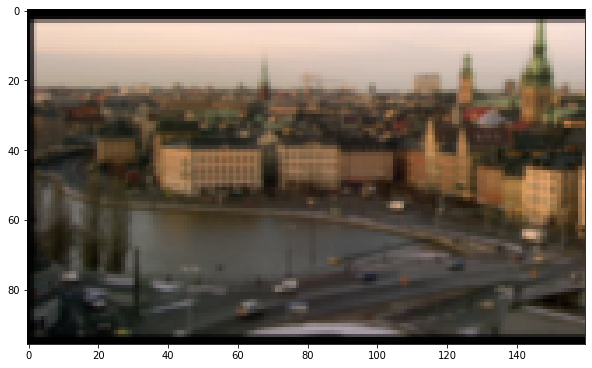

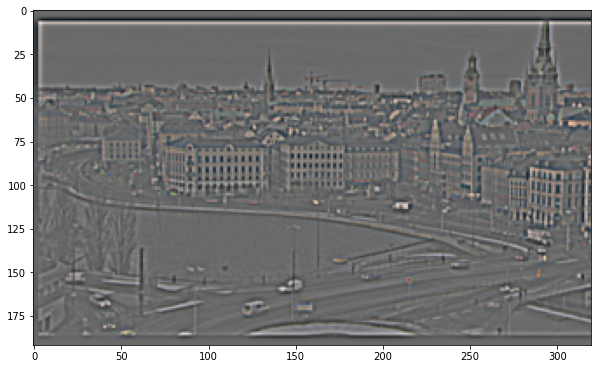

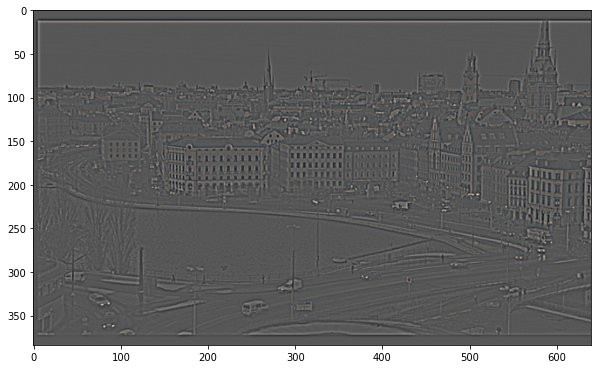

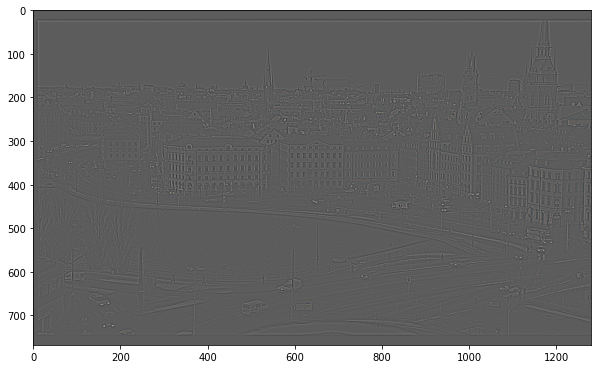

In [17]:
for l in range(n_levels+1):
    show_frame(P[l])

In [18]:
z = LP.synthesize_step(P[0], P[1])

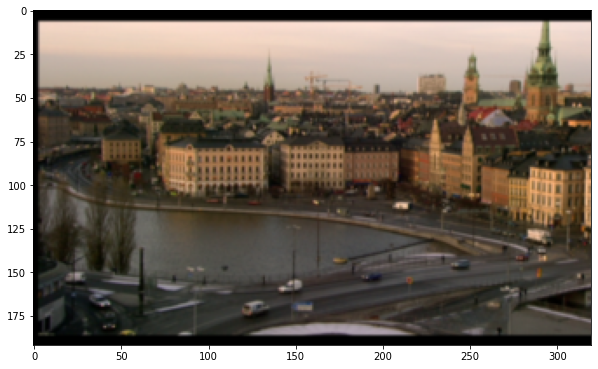

In [19]:
show_frame(z)

In [20]:
z = LP.synthesize_step(z, P[2])

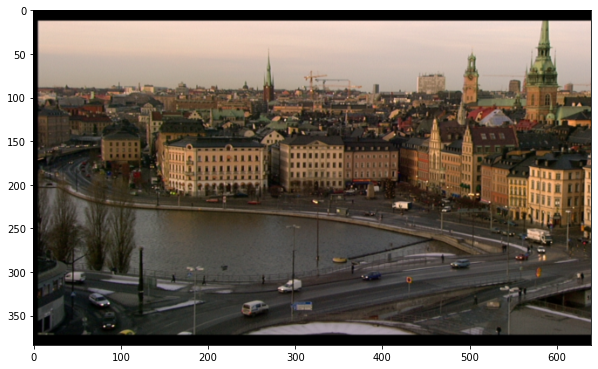

In [21]:
show_frame(z)

In [22]:
z = LP.synthesize_step(z, P[3])

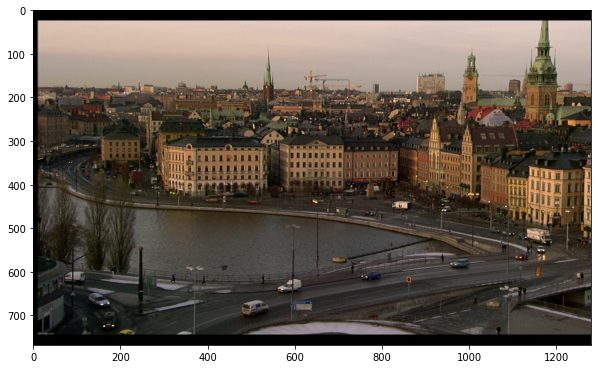

In [23]:
show_frame(z)

## Synthesis energy

In [35]:
n_levels = 7
dims = (512, 512, 3)

In [38]:
x = np.zeros(dims)
print(x.shape)
L = LP.analyze(x, n_levels)
L[0][1,1,:] = [100,100,100]
y = LP.synthesize(L, n_levels)
e = MSE.average_energy(y)
for l in range(1, n_levels):
    x = np.zeros(dims)
    L = LP.analyze(x, n_levels)
    L[l][1,1,:] = [100,100,100]
    y = LP.synthesize(L, n_levels)
    ee = MSE.average_energy(y)
    print(e/ee)
    e = ee

(512, 512, 3)
3.992668835633327
3.9845053854492427
3.965841936038718
3.9200991151464177
3.7989410757559945
3.3994140625
